##### PLOTTER OF THE RESULTS OF A GRID SEARCH

In [379]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.stats import t


In [380]:
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_10_12_23"
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_final"
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_000"

model_names = [
    "RandomForestW2V",  # no
    "RandomForest",     # no
    "LogisticRegression", # ok
    "LogisticRegressionW2V",  # ok
    "NaiveSA",                  # ok   
    "AFinn",                    # ok
    "Vader", 
    "LSTM",
    "LSTM_W2V"
]

model_name = model_names[0]

In [381]:

import pandas as pd

import pandas as pd

def create_result_metrics(results_df):
    w2v_path="/googleW2v/word2vec-google-news-300.gz"
    try:
        metrics = ['accuracy', 'f1', 'recall', 'precision']
        metric = metrics[0]
        results_df = results_df.sort_values(by=["rank_test_{}".format(metric)])
    except:
        metrics = ['score']
        metric = metrics[0]
        results_df = results_df.sort_values(by=["rank_test_{}".format(metric)])
    if model_name.startswith("RandomForest"):
        print(model_name)
        results_df = results_df.set_index(results_df["params"].apply(
            lambda x: '{' + "_".join(
                str(val).replace(w2v_path, '')
                        .replace('5', '') 
                        .replace('reviews_no_stopwords', 'R.noS.') 
                        .replace('reviews_no_punctuation', 'R.noP.') 
                        .replace('stamm_no_punctuation', 'S.noP.') 
                        .replace('stamm_no_stop_punct', 'S.noS.P.') 
                        for val in x.values()) 
                       .replace('__', '') 
                       .replace('_1_', ',') 
                       .replace('_l2', '') 
                       .replace('y(', 'y, (') 
                       .replace('i(', 'i, (') 
                        + '}')
                        ).rename_axis("hyperparam")
    elif model_name.startswith("LogisticReg"):
        print(model_name)
        results_df = results_df.set_index(results_df["params"].apply(
            lambda x: '{' + ",".join([v.replace('_', '') for v in
                [str(val).replace(w2v_path, '')
                        .replace('None', '') 
                        .replace('True', '') 
                        .replace('l2', '') 
                        .replace('reviews_no_stopwords', 'R.noS.') 
                        .replace('reviews_no_punctuation', 'R.noP.') 
                        .replace('stamm_no_punctuation', 'S.noP.') 
                        .replace('stamm_no_stop_punct', 'S.noS.P.') 
                        for val in x.values()]])
        .replace(',,', '')
        .replace('_1_', ', ')
        .replace(',1,', ', ')
        .replace('.0', '.0, ') + '}'
                        )).rename_axis("hyperparam")
    elif model_name.startswith("Naive") or model_name.startswith("AFinn") or model_name.startswith("Vader"):
        print(model_name)
        results_df = results_df.set_index(results_df["params"].apply(
            lambda x: '{' + ",".join([v.replace('_', '') for v in
                [str(val).replace(w2v_path, '')
                        .replace('None', '') 
                        .replace('True', '') 
                        .replace('l2', '') 
                        .replace('reviews_no_stopwords', 'R.noS.') 
                        .replace('reviews_no_punctuation', 'R.noP.') 
                        .replace('stamm_no_punctuation', 'S.noP.') 
                        .replace('stamm_no_stop_punct', 'S.noS.P.') 
                        for val in x.values()]])
        .replace(',,', '')
        .replace('split,False,', '')
        .replace(',1,', ', ')
        .replace('.0', '.0, ') + '}'
                        )).rename_axis("hyperparam")
    else:
        print(model_name)
        results_df = results_df.set_index(results_df["params"].apply(
            lambda x: '{' + ",".join([v.replace('_', '') for v in
                [str(val).replace(w2v_path, '')
                        .replace('None', '') 
                        .replace('True', '') 
                        .replace('l2', '') 
                        .replace('reviews_no_stopwords', 'R.noS.') 
                        .replace('reviews_no_punctuation', 'R.noP.') 
                        .replace('stamm_no_punctuation', 'S.noP.') 
                        .replace('stamm_no_stop_punct', 'S.noS.P.') 
                        for val in x.values()]])
        .replace(',,', '')
        .replace('_1_', ', ')
        .replace(',1,', ', ')
        .replace('//data//datasets/googleW2v/word2vec-google-news-300.gz,softmax, /usr/src/myapp//data//datasets/allwords.csv', '') 
        .replace(',15relu,64,300,/usr/src/myapp', '') 
        .replace('.0', '.0, ') + '}'
                        )).rename_axis("hyperparam")
        # print(results_df.iloc[0])
    # results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
    columns = [
        "mean_test_{}",
        # "std_test_{}",
        ]
    projec = ['rank_test_{}'.format(metric)]
    for m in metrics:
        for c in columns:
            projec.append(c.format(m))
    results_df[
        ["rank_test_{}".format(metric), 
        "mean_test_{}".format(metric), 
        # "std_test_{}".format(metric)
        ]
        ]

    results_metrics = results_df[projec]
    list_columns = results_metrics.columns
    map_rename = {}
    for c in list_columns:
        map_rename[c] = c.replace('rank_test_accuracy', 'rank').replace('_test_', ' ')
    print(map_rename)

    results_metrics = results_metrics.rename(columns=map_rename)
    return results_metrics

def plot_metric_hist(model_name, results_metrics, y_lim=[0.0, 1.0]):

        # https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
        values_to_plot = results_metrics

        fig, ax = plt.subplots()

        accuracy = values_to_plot['mean accuracy'].values
        f1 = values_to_plot['mean f1'].values
        recall = values_to_plot['mean recall'].values
        precision = values_to_plot['mean precision'].values

        barWidth = 0.2
        # Set position of bar on X axis 
        br1 = np.arange(len(accuracy)) 
        br2 = [x + barWidth for x in br1] 
        br3 = [x + barWidth for x in br2] 
        br4 = [x + barWidth for x in br3] 
        experiments = values_to_plot.index

        # Make the plot
        ax.set_title("Histogramm verschiedener Metriken\n für das Modell {}.".format(model_name), fontsize=14)
        ax.bar(br1, accuracy, width = barWidth, 
                edgecolor ='k', label ='ACC') 
        ax.bar(br2, f1, width = barWidth, 
                edgecolor ='k', label ='F1') 
        ax.bar(br3, recall, width = barWidth, 
                edgecolor ='k', label ='recall') 
        ax.bar(br4, precision, width = barWidth, 
                edgecolor ='k', label ='precision') 

        
        # Adding Xticks 
        ax.set_xlabel('Hyperparameters') #, fontweight ='bold', fontsize = 15) 
        ax.set_ylabel('metric value') #, fontweight ='bold', fontsize = 15) 
        ax.set_xticks([r + barWidth for r in range(len(precision))], 
                experiments, rotation=90)
        ax.set_ylim(y_lim)
        ax.grid('minor')
        
        ax.legend(ncol=4, loc='upper right')

results_metrics = create_result_metrics(results_df)

def get_model_scores(metric):
    model_scores = results_df.filter(regex=r"split\d*_test_{}".format(metric))
    return model_scores

def plots_for_metrics(model_name, results_df, metric, max_=30):
    import seaborn as sns
    # create df of model scores ordered by performance
    model_scores = get_model_scores(metric)

    # plot 30 examples of dependency between cv fold and AUC scores
    fig, ax = plt.subplots()
    sns.lineplot(
        data=model_scores.transpose().iloc[:max_],
        dashes=False,
        palette="Set1",
        marker="o",
        alpha=0.5,
        ax=ax,
    )
    ax.grid('minor')
    ax.set_xlabel("CV test fold", size=12, labelpad=10)
    ax.set_ylabel("Model accuracy", size=12)
    ax.tick_params(bottom=True, labelbottom=False)
    plt.legend([])
    plt.show()

    corr = model_scores.transpose().corr()
    # print correlation of AUC scores across folds
    # print(f"Correlation of models:\n {corr}")

    # corr.style.background_gradient(cmap='coolwarm')
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, vmin=-1, vmax=1, annot=True)

    results_metrics = create_result_metrics(results_df)

# plots_for_metrics(model_name, results_df, "f1", max_=30)
# plot_metric_hist(model_name, results_metrics)
# plt.show()

RandomForestW2V
{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 'mean recall', 'mean_test_precision': 'mean precision'}


 model RandomForestW2V
RandomForestW2V
{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 'mean recall', 'mean_test_precision': 'mean precision'}
 model RandomForest
RandomForest
{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 'mean recall', 'mean_test_precision': 'mean precision'}
 model LogisticRegression
LogisticRegression
{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 'mean recall', 'mean_test_precision': 'mean precision'}
 model LogisticRegressionW2V
LogisticRegressionW2V
{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 'mean recall', 'mean_test_precision': 'mean precision'}
 model NaiveSA
NaiveSA
{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 

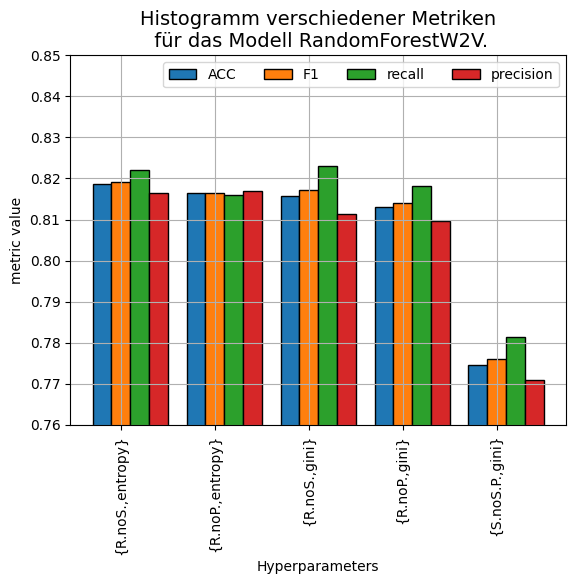

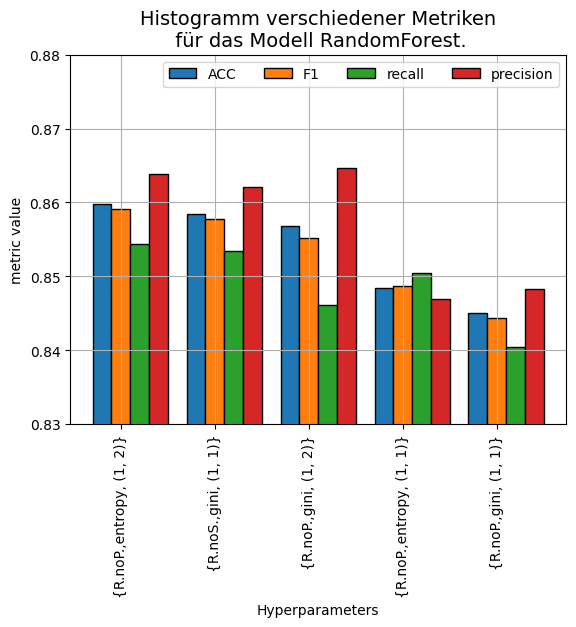

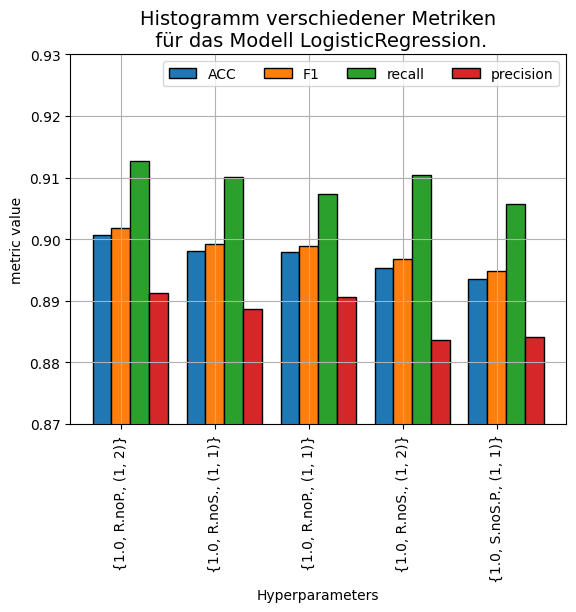

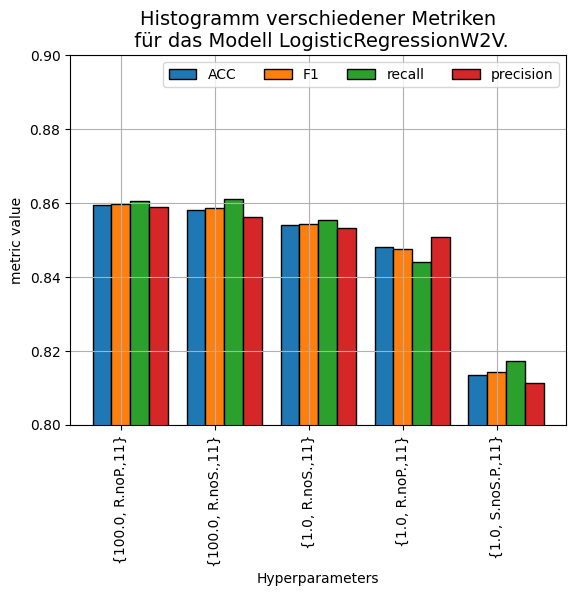

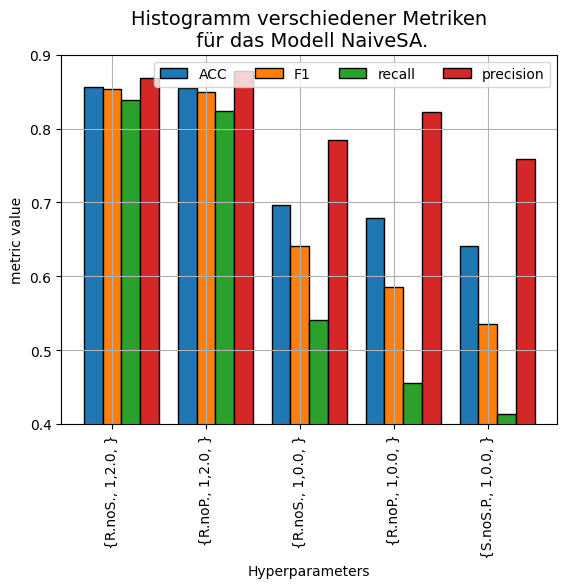

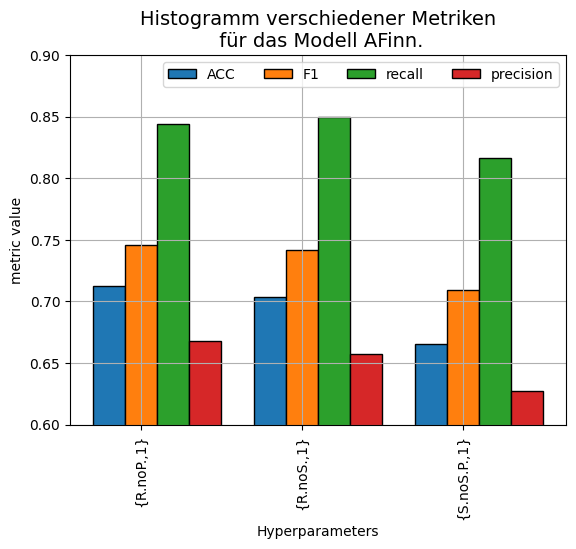

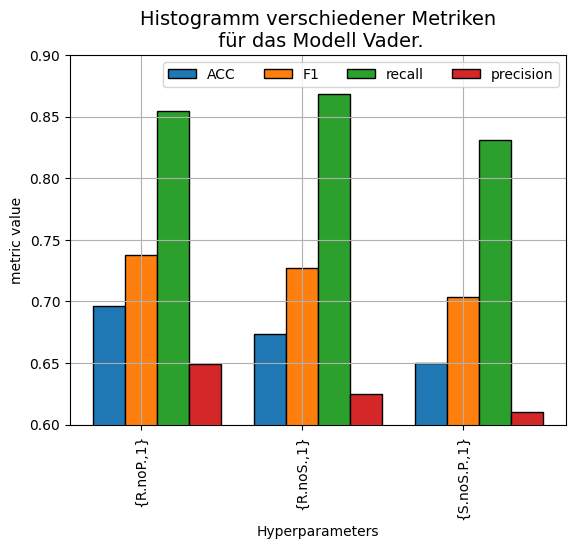

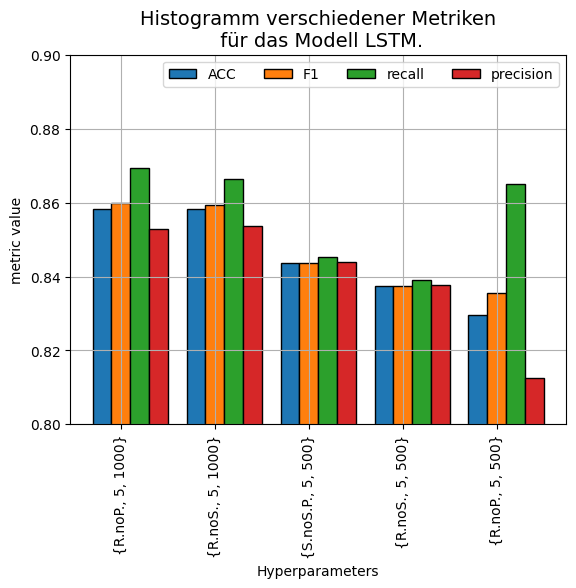

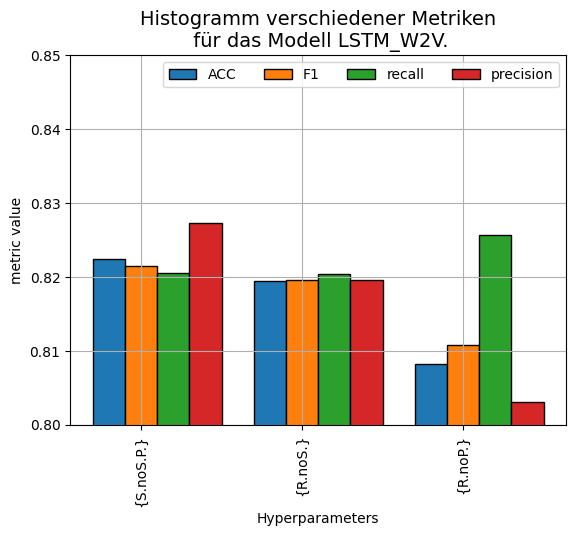

In [382]:

model_names = [
    "RandomForestW2V",        # ko
    "RandomForest",           # ko
    "LogisticRegression",     # ok
    "LogisticRegressionW2V",  # ok
    "NaiveSA",                # ok   
    "AFinn",                  # ok
    "Vader", 
    "LSTM",
    "LSTM_W2V"
]

y_lims = [
    [0.76, 0.85],
    [0.83, 0.88],
    [0.87, 0.93],
    [0.8, 0.9],
    [0.4, 0.9],
    [0.6, 0.9],
    [0.6, 0.9],
    [0.8, 0.9],
    [0.8, 0.85],
]

def load_data(output_dir, model_name):
    file_name = os.path.join(output_dir, 'grid_search_{}_cv_results.pkl'.format(model_name))
    with open(file_name, 'rb') as f:
        results = pickle.load(f)
    results_df = pd.DataFrame(results)[:5]
    # results_df.columns
    return results_df



for model_name, y_lim, in zip(model_names, y_lims):
    try:
        output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_000"
        df = load_data(output_dir, model_name)
    except Exception as e:
        print(" cannot load file for model ", model_name, ": ", str(e))
    print(" model", model_name)
    results_metrics = create_result_metrics(df)
    try:
        plot_metric_hist(model_name, results_metrics, y_lim=y_lim)
    except:
        print(" for model ", model_name)
